# Tarea 1.- Descarga y exploración del corpus

# Librerias axuliares y archivos

## Liberías

In [70]:
!pip install stop_words

In [71]:
import os
import json
import gzip
from urllib.request import urlopen
import matplotlib.pyplot as plt

from collections import Counter # Exploración
from nltk import ngrams # Exploración
from nltk.probability import FreqDist # Exploración
import unicodedata # Preprocesado
import re # Preprocesado
from stop_words import get_stop_words # Preprocesado
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from wordcloud import WordCloud

pd.set_option('display.max_rows', None) # para mostrar todas las filas
pd.set_option('display.max_columns', None) # para mostrar todas las columnas
pd.set_option('max_colwidth', None) #para mostrar todo el contenido de la columnas
pd.set_option('display.width',3000)

## Google drive mount

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
RUTA = "/content/drive/MyDrive/Entrega-NLP-Bartolomé_Flores_Vicaria"

In [74]:
%cd "$RUTA"

/content/drive/MyDrive/Entrega-NLP-Bartolomé_Flores_Vicaria


# Descarga de datos

  Para esta práctica he usado el dataset Health_and_Personal_Care de la página http://jmcauley.ucsd.edu/data/amazon/ . El dataset contiene reviews de productos de amazon de cuidado personal e higiene.

In [75]:
!wget https://jmcauley.ucsd.edu/data/amazon_v2/categoryFiles/Health_and_Personal_Care.json.gz --no-check-certificate

--2023-09-03 16:31:00--  https://jmcauley.ucsd.edu/data/amazon_v2/categoryFiles/Health_and_Personal_Care.json.gz
Resolving jmcauley.ucsd.edu (jmcauley.ucsd.edu)... 137.110.160.73
Connecting to jmcauley.ucsd.edu (jmcauley.ucsd.edu)|137.110.160.73|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 51693070 (49M) [application/x-gzip]
Saving to: ‘Health_and_Personal_Care.json.gz’

Health_and_Personal 100%[===================>]  49.30M  31.5MB/s    in 1.6s    

2023-09-03 16:31:01 (31.5 MB/s) - ‘Health_and_Personal_Care.json.gz’ saved [51693070/51693070]



In [76]:
### load the meta data
data = []
with gzip.open('Health_and_Personal_Care.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))

# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

400282
{'overall': 5.0, 'vote': '4', 'verified': False, 'reviewTime': '05 7, 2001', 'reviewerID': 'A95WOZT5K4XYH', 'asin': '000225591X', 'style': {'Format:': ' Paperback'}, 'reviewerName': 'Rachel', 'reviewText': 'A lot of reviewers have criticised this book for being unrealistic.\nthey fail to see the point.\nThe whole point of the ENTIRE book is that the plot is unbelieveable, hence people dont!\nThere is a celebrity going around murdering school-girls. No one believes Shaz Bowman\'s (a wonderful character) theory, because Jack Vance can\'t possibly be a serial killer because he\'s a "celebrity". And people say that the plot is unbelievable because celebrity\'s don\'t viciously murder. The whole poin tof the book is that no one believes Shaz because it\'s so far-fetched.\nI feel that people haven\'t got the message.\nthis book is very different to The Mermaids Singing. but equally good in a different way.\nyou should certainly read it.', 'summary': 'McDermid IS the best', 'unixReview

In [77]:
# convert list into pandas dataframe
df = pd.DataFrame.from_dict(data)
print(len(df))

400282


In [78]:
print(f"El dataset en bruto está compuesto de {len(data)} reviews.")

El dataset en bruto está compuesto de 400282 reviews.


# Análisis pre-exploratorio

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400282 entries, 0 to 400281
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         400282 non-null  float64
 1   vote            70031 non-null   object 
 2   verified        400282 non-null  bool   
 3   reviewTime      400282 non-null  object 
 4   reviewerID      400282 non-null  object 
 5   asin            400282 non-null  object 
 6   style           130029 non-null  object 
 7   reviewerName    400253 non-null  object 
 8   reviewText      399985 non-null  object 
 9   summary         400157 non-null  object 
 10  unixReviewTime  400282 non-null  int64  
 11  image           5754 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 34.0+ MB


In [80]:
#Nos quedamos con las columnas 5-star ranking ('overall') y la review ('reviewText)
df = df[['overall','reviewText']]
df = df.astype({'overall':'int'})

In [81]:
#Cambiamos los nombres de las columnas. 'Overall' por 'sentiment' y 'reviewText' por 'review'
df.columns = ['sentiment', 'review']

In [82]:
df.head(2)

,sentiment,review
0,5,"A lot of reviewers have criticised this book for being unrealistic.\nthey fail to see the point.\nThe whole point of the ENTIRE book is that the plot is unbelieveable, hence people dont!\nThere is a celebrity going around murdering school-girls. No one believes Shaz Bowman's (a wonderful character) theory, because Jack Vance can't possibly be a serial killer because he's a ""celebrity"". And people say that the plot is unbelievable because celebrity's don't viciously murder. The whole poin tof the book is that no one believes Shaz because it's so far-fetched.\nI feel that people haven't got the message.\nthis book is very different to The Mermaids Singing. but equally good in a different way.\nyou should certainly read it."
1,3,"Val McDermid is one of the most adventurous current crime writers, a welcome change from those whose every new book is a gradually less profitable clone of their previous one. This story, a sequel to the excellent 'The Mermaids Singing', is actually not much like it at all. The main characters return, but that's where the similarity ends. The Mermaids Singing focused in on several ghastly serial murders and the efforts of criminal profiler Tony Hill to get a grasp of the killer's mind, while battling the personal demons that seem to afflict every fictional police psychologist.\nIn 'The Wire in the Blood', girls are disappearing and dying and we guess quite early on who's responsible - the book details the efforts of the police to link the killings and determine the killer's identity. There are many stories in this book, and in the hands of a less skilled writer it could easily have fallen apart. Even with this writer's talent, there's a lot going on to keep track of, we're introduced in detail to a huge crowd of individuals in the first few chapters and there are lots of threads to follow.\nThe centerpiece of the plot is the return of Tony Hill, this time teaching a class of baby profilers, who all bond together and function as a forensic profiling collegiate ensemble when one of their own number disappears after getting too close to the truth. As well as heaps of information about profiling itself, the book offers insight into how territorial turf wars and the resentment by old-time beat police of the 'mumbo jumbo' of psychological tools can impact effective crime fighting - unlike his fictional FBI counterparts, Tony Hill does not ride in on a white horse as much as bang on the door and beg to be heard. Like many of Ms McDermid's books it's populated with strong females, with a nod of approval to gay women.\nThis isn't a perfect book - there are patches of coarse writing, some things are a bit hackneyed (hidden basement full of custom torture equipment...), the symbolism of the victim's injuries is over the top, and Dr Hill is only able to feel fully understood once his beloved, a Police Officer, also has 'blood on her hands'... hmmm. But it's interesting, touching on things most crime books don't, and is far better than many much better known best-sellers."


In [83]:
df['review'].isnull().sum()

297

In [84]:
df.dropna(inplace=True)

In [85]:
print(f"El dataset está compuesto de {len(df)} reviews.")

El dataset está compuesto de 399985 reviews.


# Exploración del Corpus

## Cardinalidad vocabulario

Debido al tamaño del dataset (alrededor de 400000 entradas) y la las limitaciones de recursos sólo usaremos una muestra para obtener conclusiones.

In [86]:
extract_pd = df.sample(frac=0.05, random_state=42)

In [87]:
splitted_reviews = extract_pd['review'].str.lower().str.split()
words = splitted_reviews.apply(pd.Series).stack().reset_index(drop = True)
vocabulary_ = Counter(words)

In [88]:
print(f"Las review del dataset está compuesto de {len(vocabulary_)} palabras.")

Las review del dataset está compuesto de 45232 palabras.


## Distribución Reviews por número de estrellas

In [89]:
extract_pd['sentiment'].value_counts()

5    12446
4     2639
1     2279
3     1546
2     1089
Name: sentiment, dtype: int64

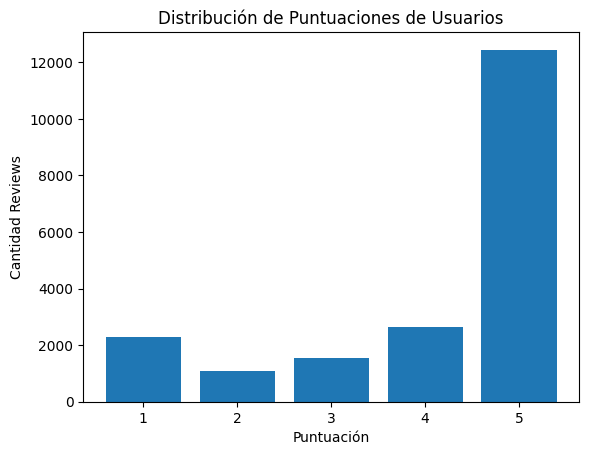

In [90]:
# Contar las puntuaciones y crear un gráfico de barras
puntuacion_counts = extract_pd['sentiment'].value_counts()

plt.bar(puntuacion_counts.index, puntuacion_counts.values)
plt.xlabel('Puntuación')
plt.ylabel('Cantidad Reviews')
plt.title('Distribución de Puntuaciones de Usuarios')
plt.show()

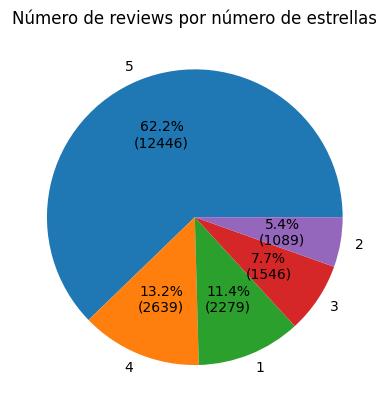

In [91]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

fig, ax = plt.subplots()
ax.set_title('Número de reviews por número de estrellas')
ax.pie(puntuacion_counts,labels = puntuacion_counts.index, autopct=autopct_format(puntuacion_counts));

## Distribución de reviews positivas y negativas

In [92]:
extract_pd['reviewbinary'] = [ 0 if s <=3 else 1 for s in extract_pd['sentiment']]

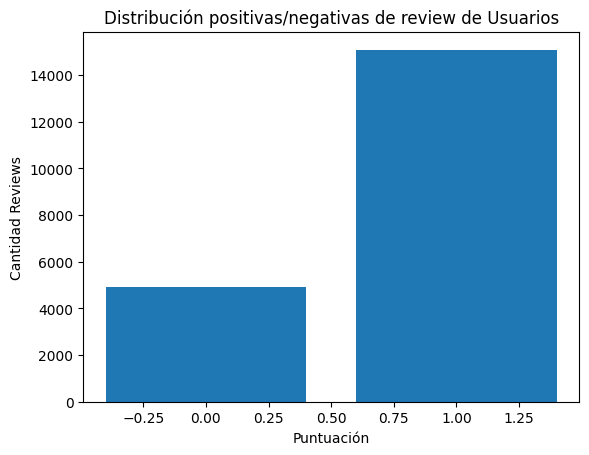

In [93]:
# Contar las puntuaciones y crear un gráfico de barras
puntuacion_counts = extract_pd['reviewbinary'].value_counts()

plt.bar(puntuacion_counts.index, puntuacion_counts.values)
plt.xlabel('Puntuación')
plt.ylabel('Cantidad Reviews')
plt.title('Distribución positivas/negativas de review de Usuarios')
plt.show()

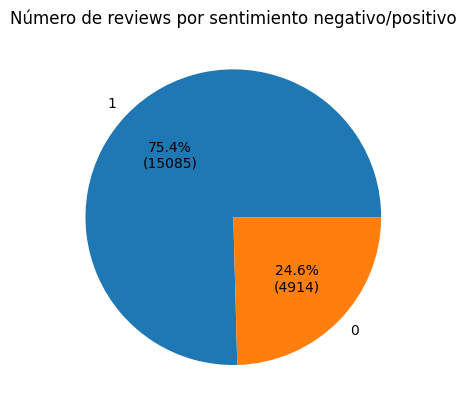

In [94]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

fig, ax = plt.subplots()
ax.set_title('Número de reviews por sentimiento negativo/positivo')
ax.pie(puntuacion_counts,labels = puntuacion_counts.index, autopct=autopct_format(puntuacion_counts));

## N-grams más frecuentes

In [95]:
wf_most_common = vocabulary_.most_common(10)

In [96]:
wf_most_common

[('the', 31057),
 ('i', 28315),
 ('and', 21862),
 ('to', 19508),
 ('a', 18885),
 ('it', 18272),
 ('this', 12000),
 ('for', 11155),
 ('is', 10906),
 ('my', 10845)]

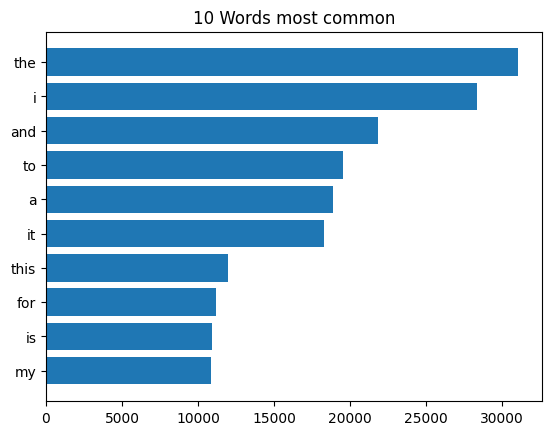

In [97]:
words_1_gram = [w[0] for w in wf_most_common]
freqs_1_gram = [w[1] for w in wf_most_common]
freqs_1_gram, words_1_gram = zip(*sorted(zip(freqs_1_gram, words_1_gram)))
plt.title("10 Words most common")
plt.barh(words_1_gram, freqs_1_gram)
plt.show()

In [98]:
bigrams_ = ngrams(words, 2)
trigrams_ = ngrams(words, 3)

In [99]:
bigrams_freq_ = FreqDist(bigrams_)
trigrams_freq_ = FreqDist(trigrams_)

In [100]:
bigrams_freq_.most_common(10)

[(('i', 'have'), 2632),
 (('of', 'the'), 2059),
 (('in', 'the'), 1969),
 (('it', 'is'), 1935),
 (('this', 'is'), 1614),
 (('and', 'i'), 1595),
 (('this', 'product'), 1556),
 (('i', 'was'), 1490),
 (('i', 'am'), 1414),
 (('is', 'a'), 1387)]

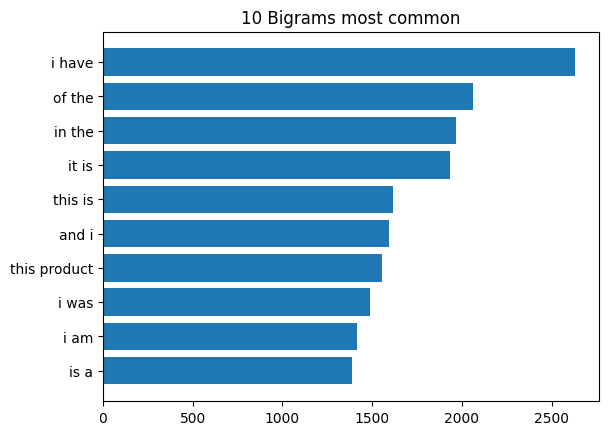

In [101]:
words_1_gram = [" ".join(map(str, w1)) for w1,w2 in bigrams_freq_.most_common(10)]
freqs_1_gram = [w2 for w1,w2 in bigrams_freq_.most_common(10)]
freqs_1_gram, words_1_gram = zip(*sorted(zip(freqs_1_gram, words_1_gram)))
plt.title("10 Bigrams most common")
plt.barh(words_1_gram, freqs_1_gram)
plt.show()

In [102]:
trigrams_freq_.most_common(10)

[(('this', 'is', 'a'), 459),
 (('i', 'have', 'been'), 317),
 (('a', 'lot', 'of'), 312),
 (('this', 'is', 'the'), 268),
 (('it', 'is', 'a'), 230),
 (('i', 'bought', 'this'), 228),
 (('i', 'love', 'this'), 222),
 (('this', 'product', 'is'), 220),
 (('one', 'of', 'the'), 220),
 (('is', 'a', 'great'), 214)]

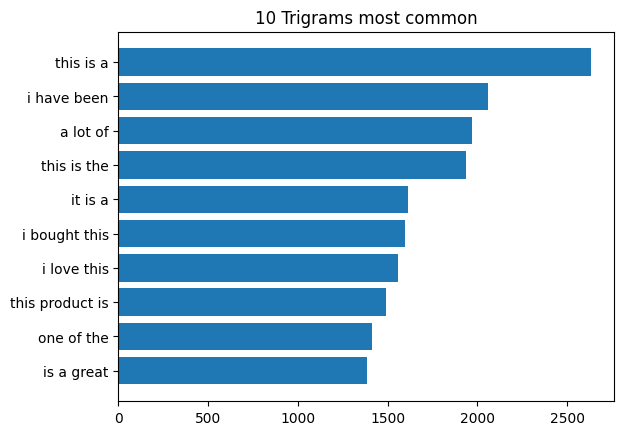

In [103]:
words_1_gram = [" ".join(map(str, w1)) for w1,w2 in trigrams_freq_.most_common(10)]
freqs_1_gram = [w2 for w1,w2 in bigrams_freq_.most_common(10)]
freqs_1_gram, words_1_gram = zip(*sorted(zip(freqs_1_gram, words_1_gram)))
plt.title("10 Trigrams most common")
plt.barh(words_1_gram, freqs_1_gram)
plt.show()

## Nubes de palabras

In [104]:
def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=60, background_color="white").generate(' '.join(text))
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

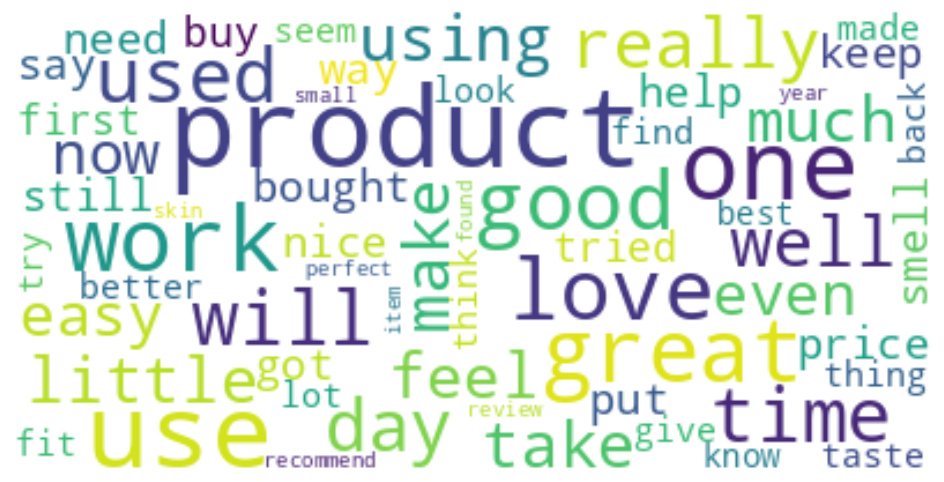

In [105]:
pos = extract_pd['review'].str.lower().str.split()
words_pos = pos.apply(pd.Series).stack().reset_index(drop = True)
plot_word_cloud(words_pos)

Debido al desbalanceo del dataset, en la nuble de palabras se ven multitud de palabras positivas.

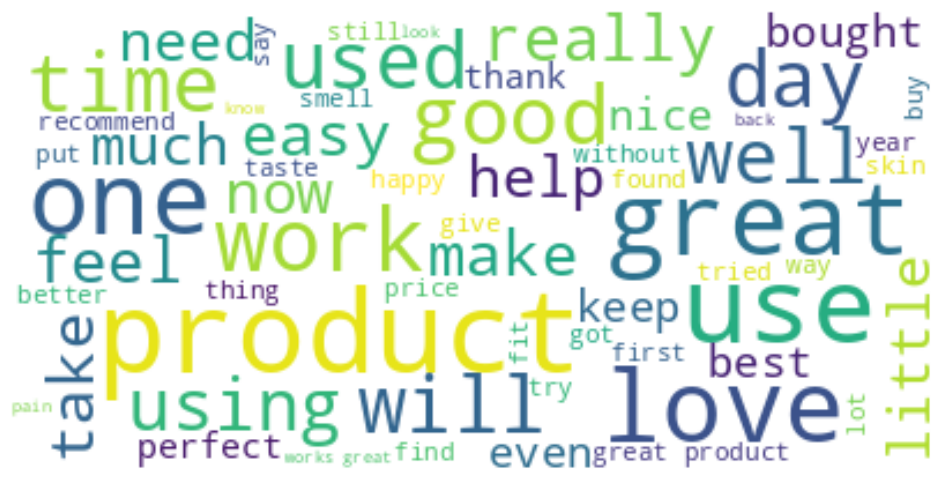

In [106]:
df_pos = extract_pd[extract_pd['sentiment']==5]
pos = df_pos['review'].str.lower().str.split()
words_pos = pos.apply(pd.Series).stack().reset_index(drop = True)
plot_word_cloud(words_pos)

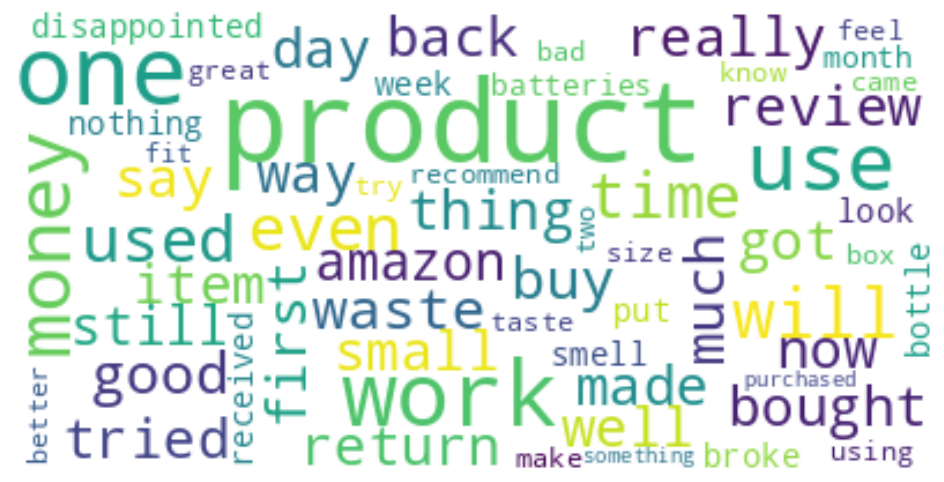

In [107]:
df_neg = extract_pd[extract_pd['sentiment']==1]
neg = df_neg['review'].str.lower().str.split()
words_neg = neg.apply(pd.Series).stack().reset_index(drop = True)
plot_word_cloud(words_neg)

Al separar las reviews en negativas y en positivas, se ven palabras diferentes dependiendo de qué tipo de review se trata.

## Pipeline

In [108]:
!pip install num2words

In [109]:
import unicodedata
from num2words import num2words

from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

tokenizer = RegexpTokenizer(r'\w+')
sw_list = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def nltk_cleaner(text, tokenizer = tokenizer, sw_list = sw_list, lemmatizer = lemmatizer):
    clean_text = list()

    # Eliminar acentos, etc
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Separar palabras eliminando signos de puntuación
    for word in tokenizer.tokenize(text):

        # Eliminar stop words
        if word not in sw_list:

        # Eliminar espacios sobrantes, convertir a minúsculas y lematizar
            clean_word = lemmatizer.lemmatize(word).lower().strip()

        # Convertir dígitos a palabras
            if clean_word.isdigit():
                clean_word = num2words(clean_word, lang='en')

            clean_text.append(clean_word)

    return ' '.join(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [110]:
extract_pd.head()

,sentiment,review,reviewbinary
64362,5,"I bought the generic version of this at first, and it didn't do anything for me. This was by far the better buy - don't go for generic or imitation products.",1
267028,1,No. Don't. Quality is not there. It's qualified for a 0 but I had not the option.,0
10467,3,I like this product ok.,0
336756,5,Exactly as in the picture and arrived a little bit before expected!,1
266204,5,"I mountain bike every single day and let me tell you, this stuff always saves my a**..... HA! Seriously it's great!",1


In [111]:
# Crear la nueva columna 'preprocesado'
extract_pd['nltk'] =  extract_pd['review'].apply(nltk_cleaner)

In [112]:
extract_pd.head()

,sentiment,review,reviewbinary,nltk
64362,5,"I bought the generic version of this at first, and it didn't do anything for me. This was by far the better buy - don't go for generic or imitation products.",1,i bought generic version first anything this far better buy go generic imitation product
267028,1,No. Don't. Quality is not there. It's qualified for a 0 but I had not the option.,0,no don quality it qualified zero i option
10467,3,I like this product ok.,0,i like product ok
336756,5,Exactly as in the picture and arrived a little bit before expected!,1,exactly picture arrived little bit expected
266204,5,"I mountain bike every single day and let me tell you, this stuff always saves my a**..... HA! Seriously it's great!",1,i mountain bike every single day let tell stuff always save ha seriously great


## Visualización en 2 dimensiones de algunos word embeddings calculados con Word2Vec (elegir 4-5 palabras y pintar las top 10 más similares)

In [113]:
from gensim.models import FastText
from gensim.models.word2vec import LineSentence
from gensim.models.phrases import Phrases, Phraser
import numpy as np
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [114]:
sent = [row.split() for row in extract_pd['nltk']]

In [115]:
sg_params = {
    'sg': 1,
    'vector_size': 75,
    'min_count': 5,
    'window': 5,
    'hs': 0,
    'negative': 20,
    'workers': 4,
    'min_n': 3,
    'max_n': 6
}


In [116]:
ft_sg = FastText(**sg_params)

In [117]:
# Skip Gram
ft_sg.build_vocab(sent)

In [118]:
print('Vocabulario compuesto por {} palabras'.format(len(ft_sg.wv.key_to_index  )))

Vocabulario compuesto por 6160 palabras


In [119]:
ft_sg.train(corpus_iterable=sent, total_examples=len(sent), epochs=10)

(3717841, 4515960)

In [120]:
ft_sg.save('./w2v_model_fast.pkl')

In [121]:
w2v_sg = Word2Vec.load('./w2v_model_fast.pkl')

In [122]:
keys = ['good','waste','love','broke']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_sg.wv.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(w2v_sg.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [123]:
tsne_model_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)

In [124]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape

In [125]:
embeddings_2d = np.array(tsne_model_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

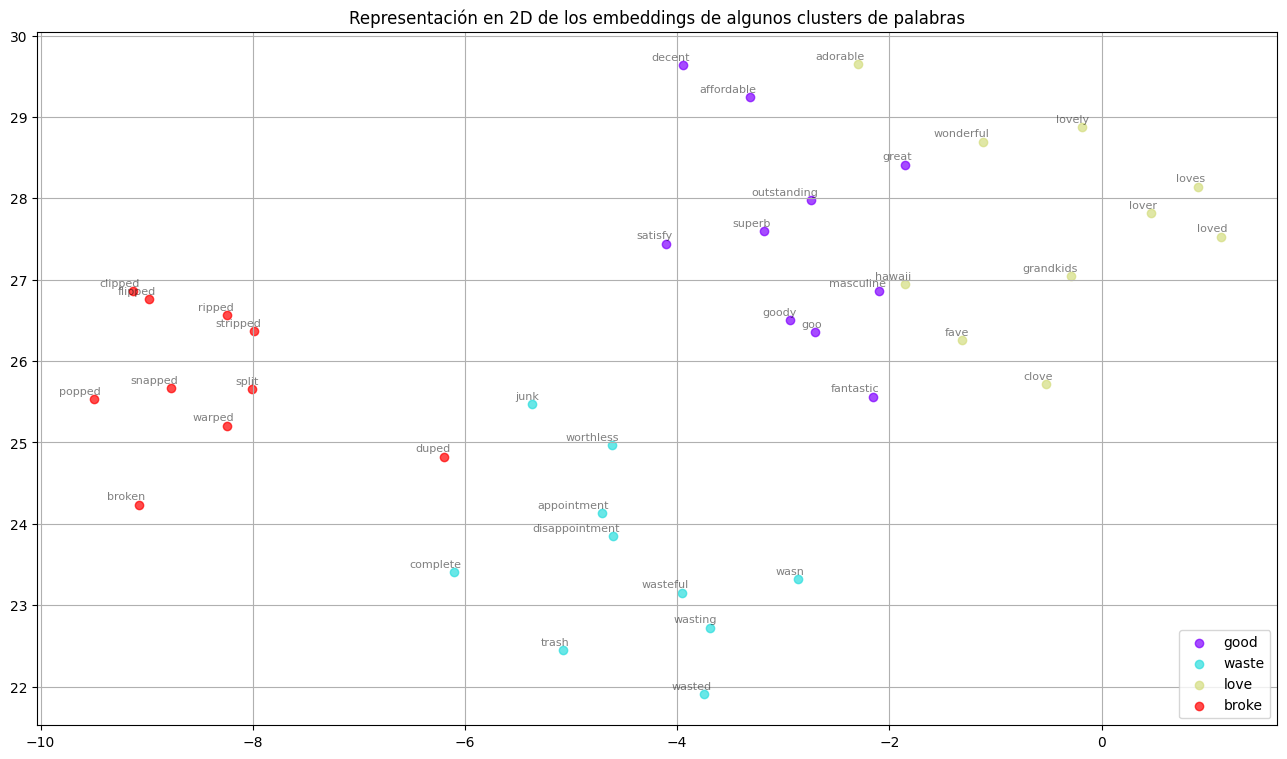

In [126]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline


def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.title('Representación en 2D de los embeddings de algunos clusters de palabras')
    # plt.savefig("f/г.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words(keys, embeddings_2d, word_clusters)

## Ley de Zipf

In [127]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

In [128]:
splitted_reviews = extract_pd['nltk'].str.lower().str.split()
words_zipf = splitted_reviews.apply(pd.Series).stack().reset_index(drop = True)

<ipython-input-128-b3dfe51b49d3>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  words_zipf = splitted_reviews.apply(pd.Series).stack().reset_index(drop = True)


In [129]:
fd = FreqDist(words_zipf)

In [130]:
fd = {k: v for k, v in sorted(fd.items(), key=lambda item: item[1], reverse=True)}

In [131]:
ranks = list()
freqs = list()

for rank, word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])

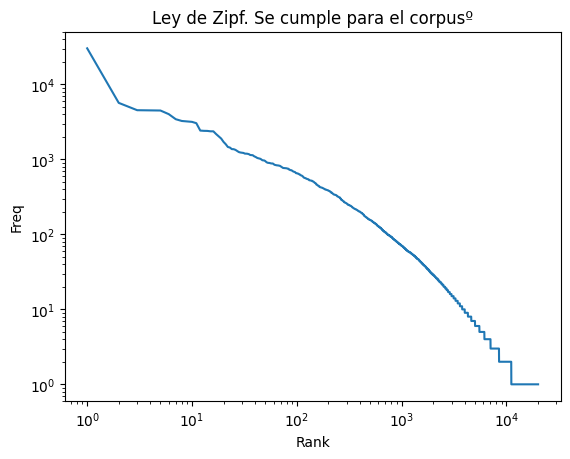

In [132]:
plt.loglog(ranks, freqs)
plt.xlabel('Rank')
plt.ylabel('Freq')
plt.title('Ley de Zipf. Se cumple para el corpusº')
plt.show()

## Palabras por review

In [133]:
# Función para contar palabras en un texto
def contar_palabras(texto):
  if pd.isna(texto):
    return 0
  return len(texto.split())

# Crear la nueva columna 'palabras_en_review'
extract_pd['word_count'] =  extract_pd['review'].apply(contar_palabras)

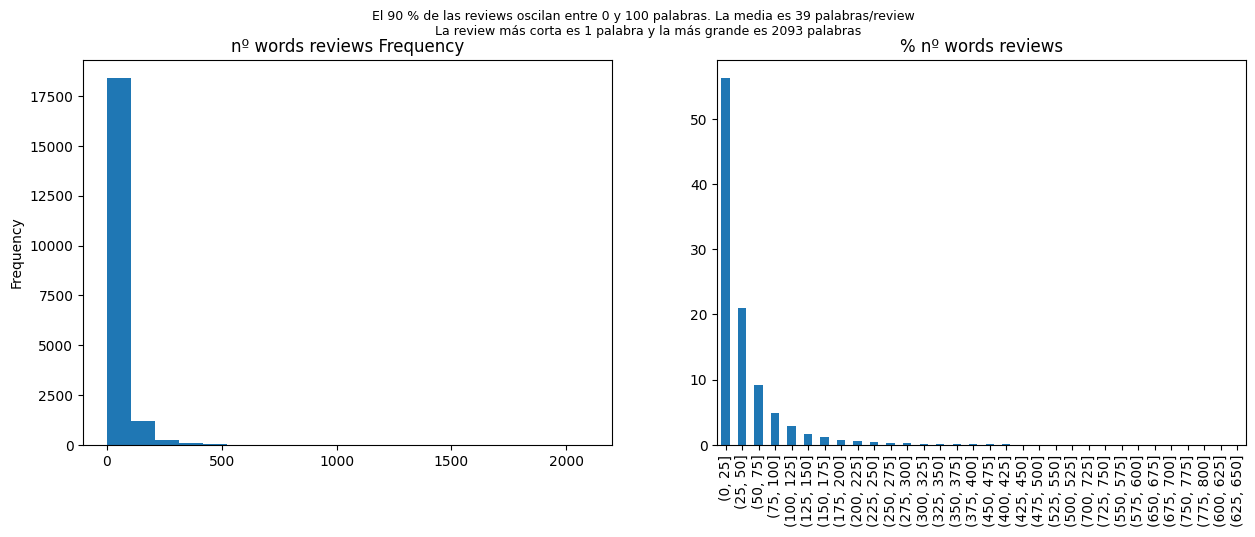

In [134]:
review_media = round(sum(extract_pd['word_count'])/len(extract_pd))
review_small = min(extract_pd['word_count'])
review_large = max(extract_pd['word_count'])
plt.figure(figsize=(15,5))
plt.subplot(1,2, 1)
extract_pd['word_count'].plot.hist(title='nº words reviews Frequency',bins=20)
plt.subplot(1,2, 2)
(100 * pd.cut(extract_pd['word_count'], bins=[x for x in range(0, 801, 25)]).value_counts() / len(extract_pd['word_count'])).plot(kind='bar', title='% nº words reviews')
plt.suptitle(f"El 90 % de las reviews oscilan entre 0 y 100 palabras. La media es {review_media} palabras/review \n La review más corta es {review_small} palabra y la más grande es {review_large} palabras", fontsize=9,y=0.98)
plt.show()

In [135]:
#Media de palabras por sentimiento
print("Las reviews con puntiaciones más bajas de 4 tienen mayor media de palabras que las review más positivas \n")
extract_pd.groupby("sentiment")["word_count"].mean().head(5)

Las reviews con puntiaciones más bajas de 4 tienen mayor media de palabras que las review más positivas 



sentiment
1    40.203598
2    42.403122
3    42.665589
4    44.802956
5    36.630162
Name: word_count, dtype: float64

#Final EDA

In [136]:
df.head()

,sentiment,review
0,5,"A lot of reviewers have criticised this book for being unrealistic.\nthey fail to see the point.\nThe whole point of the ENTIRE book is that the plot is unbelieveable, hence people dont!\nThere is a celebrity going around murdering school-girls. No one believes Shaz Bowman's (a wonderful character) theory, because Jack Vance can't possibly be a serial killer because he's a ""celebrity"". And people say that the plot is unbelievable because celebrity's don't viciously murder. The whole poin tof the book is that no one believes Shaz because it's so far-fetched.\nI feel that people haven't got the message.\nthis book is very different to The Mermaids Singing. but equally good in a different way.\nyou should certainly read it."
1,3,"Val McDermid is one of the most adventurous current crime writers, a welcome change from those whose every new book is a gradually less profitable clone of their previous one. This story, a sequel to the excellent 'The Mermaids Singing', is actually not much like it at all. The main characters return, but that's where the similarity ends. The Mermaids Singing focused in on several ghastly serial murders and the efforts of criminal profiler Tony Hill to get a grasp of the killer's mind, while battling the personal demons that seem to afflict every fictional police psychologist.\nIn 'The Wire in the Blood', girls are disappearing and dying and we guess quite early on who's responsible - the book details the efforts of the police to link the killings and determine the killer's identity. There are many stories in this book, and in the hands of a less skilled writer it could easily have fallen apart. Even with this writer's talent, there's a lot going on to keep track of, we're introduced in detail to a huge crowd of individuals in the first few chapters and there are lots of threads to follow.\nThe centerpiece of the plot is the return of Tony Hill, this time teaching a class of baby profilers, who all bond together and function as a forensic profiling collegiate ensemble when one of their own number disappears after getting too close to the truth. As well as heaps of information about profiling itself, the book offers insight into how territorial turf wars and the resentment by old-time beat police of the 'mumbo jumbo' of psychological tools can impact effective crime fighting - unlike his fictional FBI counterparts, Tony Hill does not ride in on a white horse as much as bang on the door and beg to be heard. Like many of Ms McDermid's books it's populated with strong females, with a nod of approval to gay women.\nThis isn't a perfect book - there are patches of coarse writing, some things are a bit hackneyed (hidden basement full of custom torture equipment...), the symbolism of the victim's injuries is over the top, and Dr Hill is only able to feel fully understood once his beloved, a Police Officer, also has 'blood on her hands'... hmmm. But it's interesting, touching on things most crime books don't, and is far better than many much better known best-sellers."
2,5,Started reading the first book in this series and now on the third. Absolutely love the books and cant wait to move onto the rest. Nail biting and thrilling right to the end.
3,5,I enjoyed the first book in this series so much I moved on to the second. This may have been better than the first. On to #3.
4,5,Awesome !!!!! Just read it !!!!


In [137]:
num_samples = 1000

sampled_df_1 = df[df['sentiment'] == 1].sample(n=num_samples)
sampled_df_2 = df[df['sentiment'] == 2].sample(n=num_samples)
sampled_df_3 = df[df['sentiment'] == 3].sample(n=num_samples)
sampled_df_4 = df[df['sentiment'] == 4].sample(n=num_samples)
sampled_df_5 = df[df['sentiment'] == 5].sample(n=num_samples)


result_df = pd.concat([sampled_df_1,sampled_df_2,sampled_df_3,sampled_df_4,sampled_df_5])

result_df.to_csv('reviews_small.csv', sep=';', decimal='.', index=False)

In [138]:
num_samples = 10000

sampled_df_1 = df[df['sentiment'] == 1].sample(n=num_samples)
sampled_df_2 = df[df['sentiment'] == 2].sample(n=num_samples)
sampled_df_3 = df[df['sentiment'] == 3].sample(n=num_samples)
sampled_df_4 = df[df['sentiment'] == 4].sample(n=num_samples)
sampled_df_5 = df[df['sentiment'] == 5].sample(n=num_samples)


result_df = pd.concat([sampled_df_1,sampled_df_2,sampled_df_3,sampled_df_4,sampled_df_5])

result_df.to_csv('reviews_large.csv', sep=';', decimal='.', index=False)